# Runtime： 1.5s-1.9s

In [1]:
import numpy as np
from scipy import special
import os
import pandas as pd

In [2]:
df = pd.read_csv('output/summary.tsv', sep='\t')  

In [3]:
df = df[df.accuracy != 0]

In [4]:
df_mean = df.groupby('parameters').mean()

In [5]:
df_se = df.groupby('parameters').sem()

In [6]:
df = df.groupby('parameters').agg(['mean','sem'])
df.columns = df.columns.map('_'.join)
df.reset_index()


,parameters,trial_id_mean,trial_id_sem,accuracy_mean,accuracy_sem,correct_pos_predicted_mean,correct_pos_predicted_sem,correct_sites_predicted_mean,correct_sites_predicted_sem,kl_dis_mean,kl_dis_sem
0,"param[1, 7, 10]",7.000000,1.000000,0.100000,0.000000,1.000000,0.000000,2.000000,2.000000,30.764186,2.873390
1,"param[1.5, 6, 10]",5.500000,1.322876,0.150000,0.050000,1.500000,0.500000,7.000000,1.471960,11.158871,2.058562
2,"param[1.5, 7, 10]",4.200000,1.157584,0.300000,0.126491,3.000000,1.264911,3.600000,1.503330,20.835598,8.282674
3,"param[1.5, 7, 20]",4.428571,1.324803,0.364286,0.080707,7.285714,1.614138,12.428571,2.245176,7.917577,1.663312
4,"param[1.5, 7, 5]",4.000000,1.527525,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,40.308366,4.709502
5,"param[1.5, 8, 10]",3.166667,1.194897,0.250000,0.092195,2.500000,0.921954,4.166667,1.447220,20.175920,4.722340
6,"param[2, 7, 10]",4.500000,0.957427,0.790000,0.078102,7.900000,0.781025,9.300000,0.422953,0.934146,0.419925


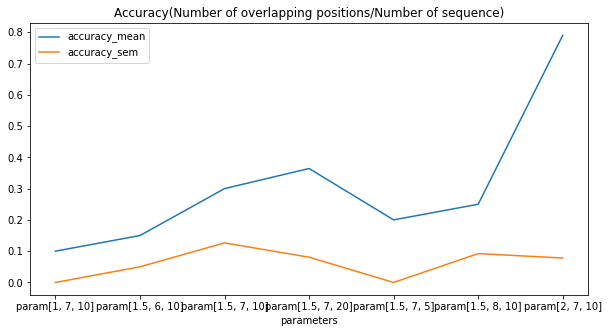

In [7]:
lines = df.plot.line(y=['accuracy_mean','accuracy_sem'],figsize=(10,5),title='Accuracy(Number of overlapping positions/Number of sequence)')

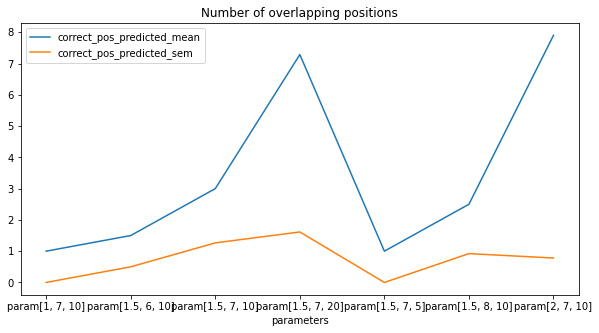

In [8]:
lines = df.plot.line(y=['correct_pos_predicted_mean','correct_pos_predicted_sem'],figsize=(10,5),title='Number of overlapping positions')

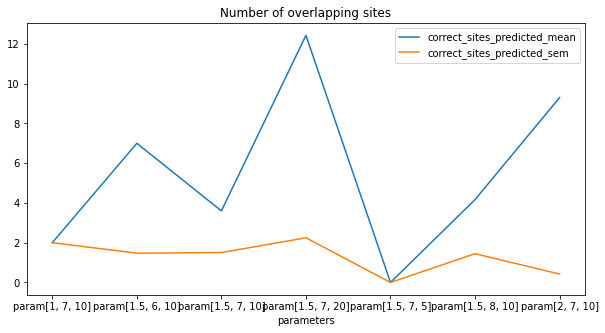

In [9]:
lines = df.plot.line(y=['correct_sites_predicted_mean','correct_sites_predicted_sem'],figsize=(10,5),title='Number of overlapping sites')

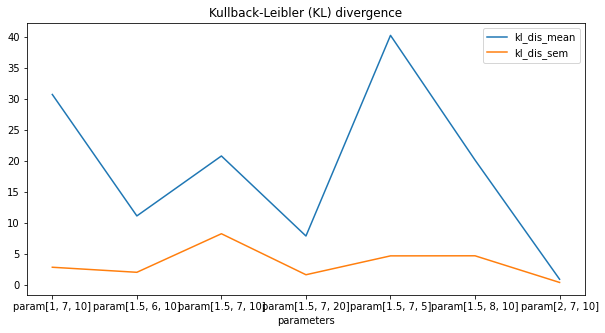

In [10]:
lines = df.plot.line(y=['kl_dis_mean','kl_dis_sem'],figsize=(10,5),title='Kullback-Leibler (KL) divergence')

In [11]:
df_mean

,trial_id,accuracy,correct_pos_predicted,correct_sites_predicted,kl_dis
parameters,,,,,
"param[1, 7, 10]",7.000000,0.100000,1.000000,2.000000,30.764186
"param[1.5, 6, 10]",5.500000,0.150000,1.500000,7.000000,11.158871
"param[1.5, 7, 10]",4.200000,0.300000,3.000000,3.600000,20.835598
"param[1.5, 7, 20]",4.428571,0.364286,7.285714,12.428571,7.917577
"param[1.5, 7, 5]",4.000000,0.200000,1.000000,0.000000,40.308366
"param[1.5, 8, 10]",3.166667,0.250000,2.500000,4.166667,20.175920
"param[2, 7, 10]",4.500000,0.790000,7.900000,9.300000,0.934146


In [12]:
df_se

,trial_id,accuracy,correct_pos_predicted,correct_sites_predicted,kl_dis
parameters,,,,,
"param[1, 7, 10]",1.000000,0.000000,0.000000,2.000000,2.873390
"param[1.5, 6, 10]",1.322876,0.050000,0.500000,1.471960,2.058562
"param[1.5, 7, 10]",1.157584,0.126491,1.264911,1.503330,8.282674
"param[1.5, 7, 20]",1.324803,0.080707,1.614138,2.245176,1.663312
"param[1.5, 7, 5]",1.527525,0.000000,0.000000,0.000000,4.709502
"param[1.5, 8, 10]",1.194897,0.092195,0.921954,1.447220,4.722340
"param[2, 7, 10]",0.957427,0.078102,0.781025,0.422953,0.419925
